# Coronavirus disease (COVID-19) Pandemic Data-Analysis

#### Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus.
I did my best to follow a comprehensive, but not exhaustive, analysis of the data. I'm far from reporting a rigorous study in this kernel, but I hope that it can be useful for the community, so I'm sharing how I applied some of those data analysis principles to this problem. I will also be doing visualizations using plotly, matplotlib and seaborn from which we are gonna get valuable insights.

***
***What we are doing in this kernel is:***

1. Basic exploratory data analysis
2. Univariable study: We'll just focus on the dependent variables i.e. ('Confirmed' ,'Deaths','Active') and try to know a little bit more about it.
3. Multivariate study: We'll try to understand how the dependent variable and independent variables relate.
4. To show vivid examples of Plotly, Seaborn and Matplotlib visualization libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

F:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv("covid_19.csv", parse_dates=['Date'])
df.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0
5,NaN,Antigua and Barbuda,17.0608,-61.7964,2020-01-22,0,0,0
6,NaN,Argentina,-38.4161,-63.6167,2020-01-22,0,0,0
7,NaN,Armenia,40.0691,45.0382,2020-01-22,0,0,0
8,Australian Capital Territory,Australia,-35.4735,149.0124,2020-01-22,0,0,0
9,New South Wales,Australia,-33.8688,151.2093,2020-01-22,0,0,0


In [3]:
#Renaming the columns for easy usage
df.rename(columns={
                     'Date': 'date', 
                     'Province/State':'state',
                     'Country/Region':'country',
                     'Lat':'latitude', 
                     'Long':'longitude',
                     'Confirmed': 'confirmed',
                     'Deaths':'deaths',
                     'Recovered':'recovered'
                    }, inplace=True)

In [4]:
df.columns

Index(['state', 'country', 'latitude', 'longitude', 'date', 'confirmed',
       'deaths', 'recovered'],
      dtype='object')

In [5]:
df.shape

(30475, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30475 entries, 0 to 30474
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   state      9200 non-null   object        
 1   country    30475 non-null  object        
 2   latitude   30475 non-null  float64       
 3   longitude  30475 non-null  float64       
 4   date       30475 non-null  datetime64[ns]
 5   confirmed  30475 non-null  int64         
 6   deaths     30475 non-null  int64         
 7   recovered  30475 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 1.9+ MB


#### Adding an Active Column

In [7]:
# Active Case = confirmed - deaths - recovered
df['active'] = df['confirmed'] - df['deaths'] - df['recovered']
df.head()

,state,country,latitude,longitude,date,confirmed,deaths,recovered,active
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0


In [8]:
df.describe(include='object')

,state,country
count,9200,30475
unique,80,188
top,Sichuan,China
freq,115,3795


In [9]:
df.describe(include='int64')

,confirmed,deaths,recovered,active
count,3.047500e+04,30475.000000,30475.000000,3.047500e+04
mean,4.351487e+03,289.738835,1268.222182,2.793526e+03
std,3.970424e+04,2753.265518,9400.129997,3.050500e+04
min,0.000000e+00,0.000000,0.000000,-6.000000e+00
25%,0.000000e+00,0.000000,0.000000,0.000000e+00
50%,1.700000e+01,0.000000,0.000000,6.000000e+00
75%,3.765000e+02,5.000000,85.000000,1.485000e+02
max,1.442824e+06,87530.000000,250747.000000,1.104547e+06


In [10]:
df.describe()

,latitude,longitude,confirmed,deaths,recovered,active
count,30475.000000,30475.000000,3.047500e+04,30475.000000,30475.000000,3.047500e+04
mean,21.181891,22.881195,4.351487e+03,289.738835,1268.222182,2.793526e+03
std,24.904281,70.245581,3.970424e+04,2753.265518,9400.129997,3.050500e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000,-6.000000e+00
25%,6.877000,-15.310100,0.000000e+00,0.000000,0.000000,0.000000e+00
50%,23.634500,21.005900,1.700000e+01,0.000000,0.000000,6.000000e+00
75%,41.153300,78.000000,3.765000e+02,5.000000,85.000000,1.485000e+02
max,71.706900,178.065000,1.442824e+06,87530.000000,250747.000000,1.104547e+06


In [11]:
print("The First Date is: {}".format(
    df['date'].min()
))
print("The Last Date is: {}".format(
    df['date'].max()
))

The First Date is: 2020-01-22 00:00:00
The Last Date is: 2020-05-15 00:00:00


The dataset starts from 22nd January, 2020 to 15th May, 2020

In [12]:
df.isnull().sum()

state        21275
country          0
latitude         0
longitude        0
date             0
confirmed        0
deaths           0
recovered        0
active           0
dtype: int64

#### Countries going through this pandemic:

In [13]:
set(df.country.unique())

{'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [14]:
df['date'].min()

Timestamp('2020-01-22 00:00:00')

In [15]:
df['date'].max()

Timestamp('2020-05-15 00:00:00')

In [16]:
top = df[df['date'] == df['date'].max()]
top[['country', 'confirmed', 'deaths', 'active']].head()

,country,confirmed,deaths,active
30210,Afghanistan,6053,153,5155
30211,Albania,916,31,180
30212,Algeria,6629,536,2822
30213,Andorra,761,49,108
30214,Angola,48,2,29


top is the dataset having the rows and columns which has date 15th May, 2020

In [17]:
top.head()

,state,country,latitude,longitude,date,confirmed,deaths,recovered,active
30210,NaN,Afghanistan,33.0000,65.0000,2020-05-15,6053,153,745,5155
30211,NaN,Albania,41.1533,20.1683,2020-05-15,916,31,705,180
30212,NaN,Algeria,28.0339,1.6596,2020-05-15,6629,536,3271,2822
30213,NaN,Andorra,42.5063,1.5218,2020-05-15,761,49,604,108
30214,NaN,Angola,-11.2027,17.8739,2020-05-15,48,2,17,29


In [18]:
top.shape

(265, 9)

In [19]:
world = top.groupby('country')['confirmed','active','deaths', 'recovered'].sum().reset_index()
world.head()

C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,country,confirmed,active,deaths,recovered
0,Afghanistan,6053,5155,153,745
1,Albania,916,180,31,705
2,Algeria,6629,2822,536,3271
3,Andorra,761,108,49,604
4,Angola,48,29,2,17


In [20]:
world.shape

(188, 5)

### Top 20 countries having most cases as confirmed

In [21]:
world.sort_values('confirmed', ascending=False).head(20)

,country,confirmed,active,deaths,recovered
174,US,1442824,1104547,87530,250747
139,Russia,262843,202199,2418,58226
178,United Kingdom,238004,202879,34078,1047
158,Spain,230183,57941,27459,144783
85,Italy,223885,72070,31610,120205
23,Brazil,220291,120359,14962,84970
62,France,179630,91536,27532,60562
66,Germany,175233,15739,7897,151597
173,Turkey,146457,36269,4055,106133
81,Iran,116635,17897,6902,91836


#### Total Confirmed Cases till 15th May, 2020

In [22]:
total_cases = df.groupby('date')['date', 'confirmed'].sum().reset_index()
total_cases['date'] = pd.to_datetime(total_cases['date'])
total_cases

C:\Users\ASUS\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
5,2020-01-27,2927
6,2020-01-28,5578
7,2020-01-29,6166
8,2020-01-30,8234
9,2020-01-31,9927


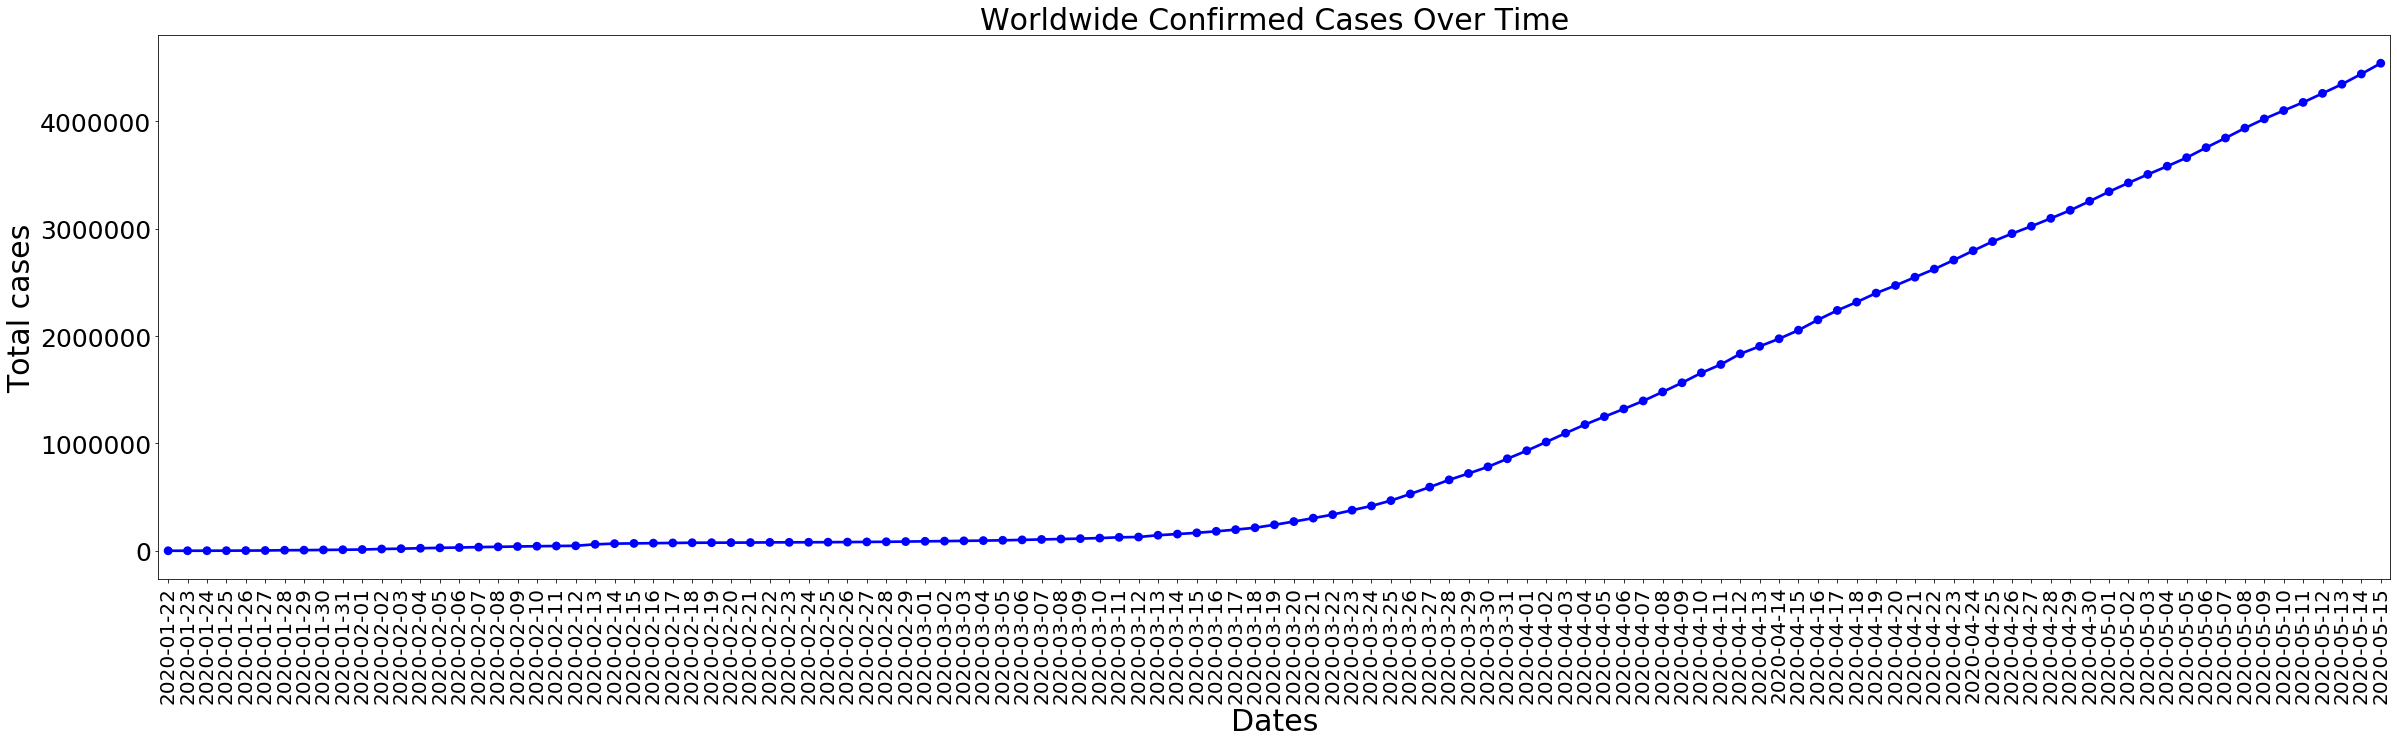

In [33]:
plt.figure(figsize= (40,10))
plt.xticks(rotation = 90 ,fontsize = 20)
plt.yticks(fontsize = 25)
plt.xlabel("Dates",fontsize = 30)
plt.ylabel('Total Cases',fontsize = 30)
plt.title("Worldwide Confirmed Cases Over Time" , fontsize = 30)

ax = sns.pointplot(x=total_cases.date.dt.date , y=total_cases.confirmed , color = 'blue').set(xlabel='Dates', ylabel='Total cases')

***Here are my observations :***
1. The slope of the line, in the beginning, was gradually ascending and at recent times, it's very high!
2. At the current rate, there are no signs of a drop in the total cases.
3. If protective measures are not taken, there's no wonder the slope reaches to max

In [24]:
top = df[df['date'] == df['date'].max()]
top_casualities = top.groupby(by = 'country')['deaths'].sum().sort_values(ascending = False).head(20).reset_index()
top_casualities

,country,deaths
0,US,87530
1,United Kingdom,34078
2,Italy,31610
3,France,27532
4,Spain,27459
5,Brazil,14962
6,Belgium,8959
7,Germany,7897
8,Iran,6902
9,Canada,5679


In [25]:
top = df[df['date'] == df['date'].max()]
top_casualities = top.groupby(by = 'country')['confirmed'].sum().sort_values(ascending = False).head(20).reset_index()
top_casualities

,country,confirmed
0,US,1442824
1,Russia,262843
2,United Kingdom,238004
3,Spain,230183
4,Italy,223885
5,Brazil,220291
6,France,179630
7,Germany,175233
8,Turkey,146457
9,Iran,116635


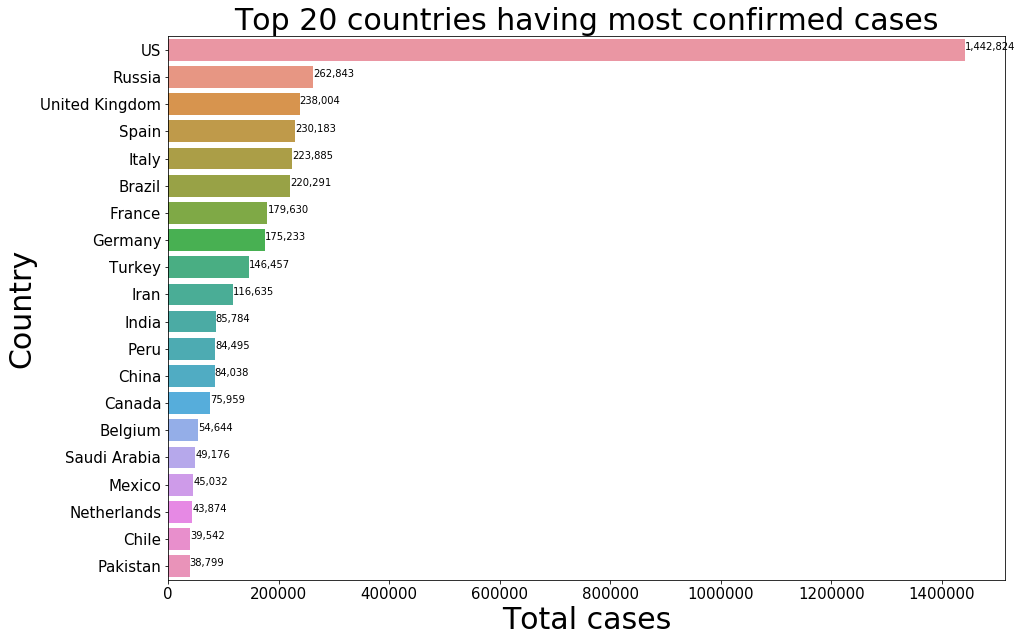

In [26]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most confirmed cases" , fontsize = 30)

ax = sns.barplot(x = top_casualities.confirmed, y = top_casualities.country)

for i, (value, name) in enumerate(zip(top_casualities.confirmed, top_casualities.country)):
    ax.text(value, i-.1, f'{value:,.0f}',  size=10, ha='left',  va='center')
    
ax.set(xlabel='Total cases', ylabel='Country')
plt.show()

In [27]:
top = df[df['date'] == df['date'].max()]
top_casualities = top.groupby('country')['active'].sum().sort_values(ascending = False).head(20).reset_index()
top_casualities

,country,active
0,US,1104547
1,United Kingdom,202879
2,Russia,202199
3,Brazil,120359
4,France,91536
5,Italy,72070
6,Canada,70280
7,Spain,57941
8,Peru,54956
9,India,52773


[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

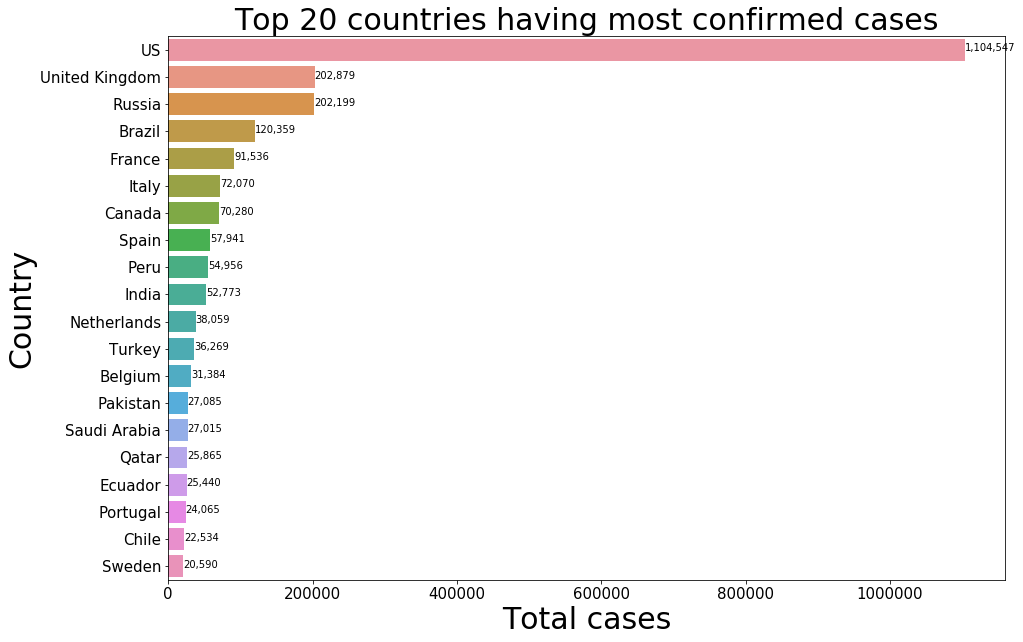

In [28]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most confirmed cases" , fontsize = 30)
ax = sns.barplot(x = top_casualities.active, y = top_casualities.country)
for i, (value, name) in enumerate(zip(top_casualities.active,top_casualities.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total cases', ylabel='Country')

In [29]:
top = df[df['date'] == df['date'].max()]
top_casualities = top.groupby(by = 'country')['deaths'].sum().sort_values(ascending = False).head(20).reset_index()
top_casualities

,country,deaths
0,US,87530
1,United Kingdom,34078
2,Italy,31610
3,France,27532
4,Spain,27459
5,Brazil,14962
6,Belgium,8959
7,Germany,7897
8,Iran,6902
9,Canada,5679


[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

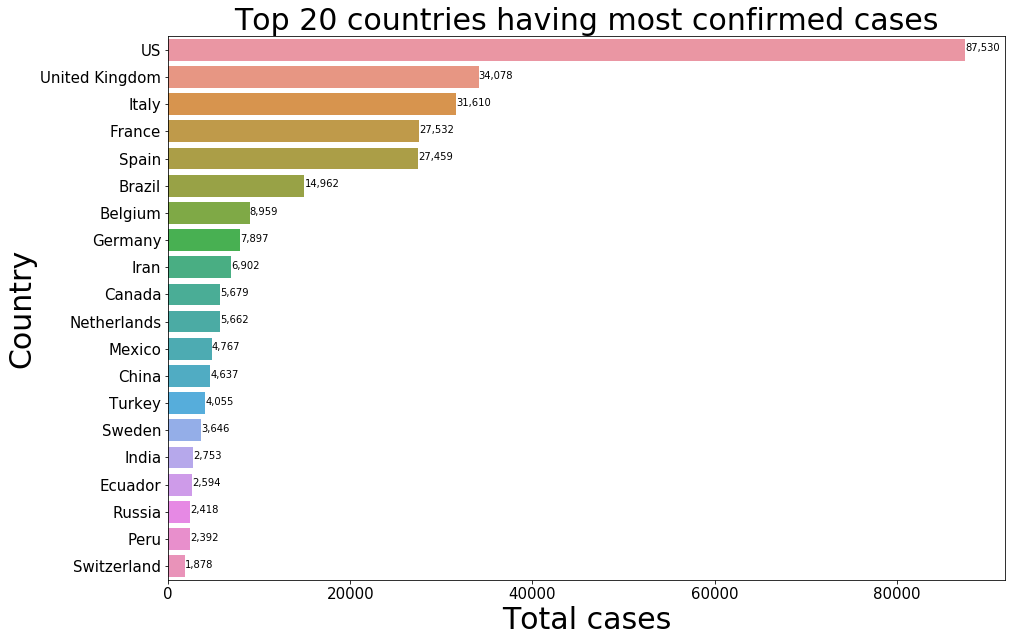

In [30]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most confirmed cases" , fontsize = 30)
ax = sns.barplot(x = top_casualities.deaths, y = top_casualities.country)
for i, (value, name) in enumerate(zip(top_casualities.deaths,top_casualities.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total cases', ylabel='Country')

In [31]:
top = df[df['date'] == df['date'].max()]
top_casualities = top.groupby(by = 'country')['recovered'].sum().sort_values(ascending = False).head(20).reset_index()
top_casualities

,country,recovered
0,US,250747
1,Germany,151597
2,Spain,144783
3,Italy,120205
4,Turkey,106133
5,Iran,91836
6,Brazil,84970
7,China,79281
8,France,60562
9,Russia,58226


[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

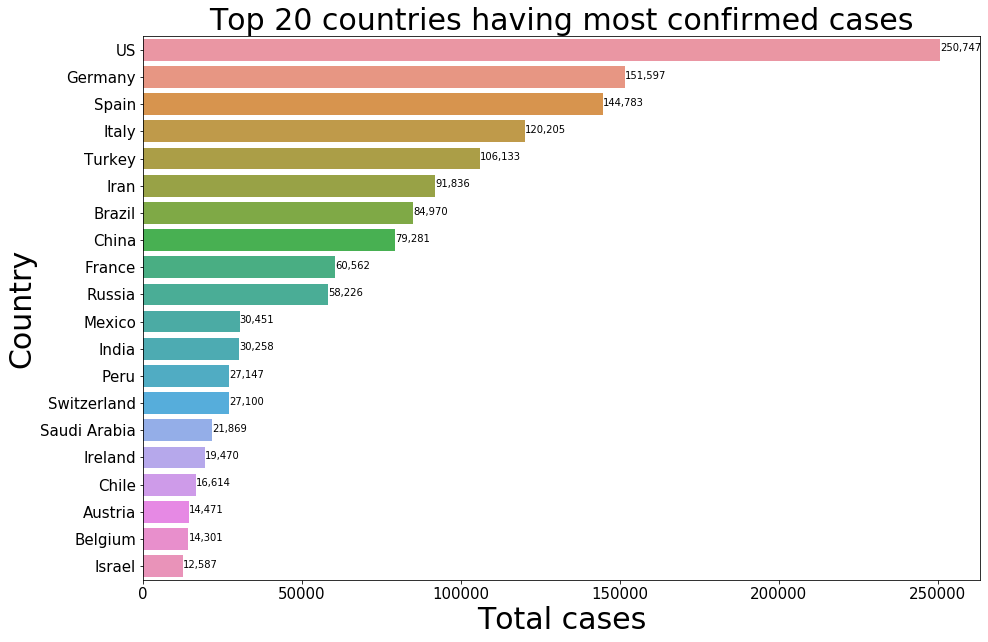

In [32]:
plt.figure(figsize= (15,10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Total cases",fontsize = 30)
plt.ylabel('Country',fontsize = 30)
plt.title("Top 20 countries having most confirmed cases" , fontsize = 30)
ax = sns.barplot(x = top_casualities.recovered, y = top_casualities.country)
for i, (value, name) in enumerate(zip(top_casualities.recovered,top_casualities.country)):
    ax.text(value, i-.05, f'{value:,.0f}',  size=10, ha='left',  va='center')
ax.set(xlabel='Total cases', ylabel='Country')